# Obesity Levels Classification

## **Introduccion**

El dataset utilizado en este proyecto proviene de **Kaggle** y se centra en el estudio de los niveles de obesidad entre individuos de diversas edades, géneros y orígenes geográficos, en relación con sus estilos de vida, hábitos alimenticios y actividad física. Contiene variables como la ingesta de alimentos, el consumo de agua, la frecuencia de actividad física, el uso de tecnología, y más, lo que permite una exploración detallada de cómo estos factores pueden influir en el peso y la salud de una persona.

Este conjunto de datos es especialmente relevante dado el aumento global de las tasas de obesidad y sus implicaciones para la salud pública. La obesidad está vinculada a numerosas enfermedades crónicas, incluyendo diabetes tipo 2, enfermedades cardiovasculares y algunos tipos de cáncer, lo que hace esencial entender y mitigar sus causas.


## **Objetivo del Proyecto**

El objetivo principal de este proyecto es desarrollar un modelo de clasificación multiclase que pueda predecir el nivel de obesidad de un individuo basado en sus hábitos de vida y características personales. Este modelo no solo ayudará a identificar a los individuos en riesgo sino que también contribuirá a la creación de intervenciones personalizadas para prevenir la obesidad antes de que se convierta en un problema de salud.

Las hipótesis específicas que exploraremos incluyen:

* **Hipótesis 1**: Existe una correlación significativa entre la falta de actividad física y los niveles más altos de obesidad.

* **Hipótesis 2**: Los individuos mas jovenes tienden a tener mayor problemas de obesidad.

## **Contexto Comercial**

Desde una perspectiva comercial y de salud pública, este análisis es crucial por varias razones:

* __Salud Pública:__ Comprender los factores que contribuyen a la obesidad puede ayudar a las autoridades sanitarias a diseñar programas más efectivos para combatir esta epidemia global.

* __Intervenciones Preventivas:__ Al predecir la probabilidad de obesidad basada en estilos de vida modificables, podemos ofrecer recomendaciones personalizadas que potencialmente reduzcan el riesgo de desarrollar obesidad y sus comorbilidades asociadas.

* __Beneficios Económicos:__ Reducir la prevalencia de obesidad puede disminuir significativamente los costos de atención médica asociados con sus condiciones relacionadas. Para las empresas del sector de la salud, los modelos predictivos pueden ser herramientas valiosas para dirigir programas de bienestar y reducir los costos a largo plazo.

* __Desarrollo de Productos:__ Para las empresas en el sector de la alimentación y el fitness, entender las tendencias y los factores asociados a la obesidad puede orientar el desarrollo de productos y servicios que promuevan un estilo de vida más saludable.

Este proyecto, por lo tanto, no solo tiene el potencial de mejorar la calidad de vida de las personas, sino también de ofrecer ventajas económicas tangibles para una variedad de stakeholders en el sector de la salud y el bienestar.

## Descripción de Variables

* __Gender__: Categoría binaria que indica el género del individuo, típicamente marcado como 'Male' o 'Female'.

* __Age__: Edad del individuo expresada en años. Es una variable numérica continua.

* __Height__: Altura del individuo en metros. Es una variable numérica continua que ayuda a calcular el índice de masa corporal (BMI).

* __Weight__: Peso del individuo en kilogramos. Es otra variable numérica continua utilizada en el cálculo del BMI.

* __Family_history_with_overweight__: Variable binaria ('yes' o 'no') que indica si existen antecedentes familiares de sobrepeso u obesidad.

* __FAVC (Frequent consumption of high caloric food)__: Variable binaria que indica si el individuo consume frecuentemente alimentos altamente calóricos.

* __FCVC (Frequency of consumption of vegetables)__: Frecuencia con la que el individuo consume vegetales en su dieta, expresada en una escala ordinal (por ejemplo, de 1 a 3).

* __NCP (Number of main meals)__: Número de comidas principales que el individuo tiene al día (por ejemplo, menos de 3, 3, y más de 3).

* __CAEC (Consumption of food between meals)__: Frecuencia con la que el individuo consume alimentos entre comidas, con categorías como 'Never', 'Sometimes', 'Frequently', 'Always'.

* __SMOKE__: Variable binaria que indica si el individuo fuma.

* __CH2O (Consumption of water daily)__: Cantidad de agua consumida diariamente, expresada en litros.

* __SCC (Calories consumption monitoring)__: Variable binaria que indica si el individuo monitorea su consumo de calorías.

* __FAF (Physical activity frequency)__: Frecuencia de actividad física semanal, generalmente capturada en una escala ordinal.

* __TUE (Time using technology devices)__: Tiempo gastado en dispositivos tecnológicos cada día, medido en horas.

* __CALC (Consumption of alcohol)__: Frecuencia de consumo de alcohol, con categorías como 'Never', 'Sometimes', 'Frequently', 'Always'.

* __MTRANS (Type of transportation used)__: Tipo de transporte más utilizado por el individuo, como 'Automobile', 'Motorbike', 'Bicycle', 'Public_Transportation', y 'Walking'.

* __Obeyesdad__: Variable objetivo clasificada según diferentes niveles de obesidad basados en el índice de masa corporal (BMI), con categorías como 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', etc.

## Carga de datos

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Extraer dataset desde una URL
url = "https://drive.google.com/uc?export=download&id=1IsF2FA0n8sx-uVrfSeNVY2SyXKWMIe4W"

# Cargar base de datos en un DataFrame
df = pd.read_csv(url)

# Mostrar primeros registros del DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Mostramos el numero de filas y columnas
df.shape

(2111, 17)

## Limpieza de Datos

In [4]:
# Cambiar el tipo de datos de la columna 'Age' a entero
df['Age'] = df['Age'].astype(int)

# Crear una nueva columna llamada 'BMI' (Balance Mass Index)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Mostrar las primeras filas para verificar la nueva columna
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [5]:
# Eliminar registros duplicados
df.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [6]:
# Mostrar estadísticas generales para variables numéricas
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.972525,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.308664,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


## Análisis de datos exploratorio (EDA)

Un mapa de calor de correlación es una herramienta valiosa en el análisis exploratorio de datos (EDA) porque ofrece una visión rápida y clara de cómo las diferentes variables numéricas en un conjunto de datos están relacionadas entre sí.

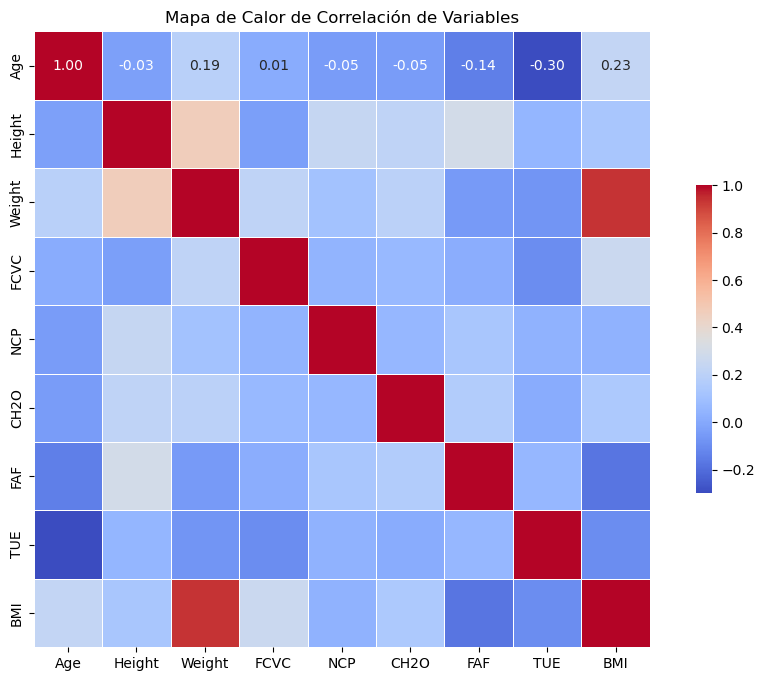

In [7]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 8))

# Drawing the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding titles and labels
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

In [8]:
print(correlation_matrix)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.030738  0.190263  0.012024 -0.047391 -0.045675 -0.144725   
Height -0.030738  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.190263  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.012024 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.047391  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045675  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144725  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.299439  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   
BMI     0.232461  0.131785  0.934806  0.263651  0.039969  0.144200 -0.177537   

             TUE       BMI  
Age    -0.299439  0.232461  
Height  0.051912  0.131785  
Weight -0.071561  0.934806  
FCVC   -0.101135  0.263651  
NCP     0.036326  0.039969  
CH2O    0.011965  0.14420

Dado que **Height** y **Weight** muestran una correlación moderada, consideramos ideal visualizar esta relación en un diagrama de dispersión.

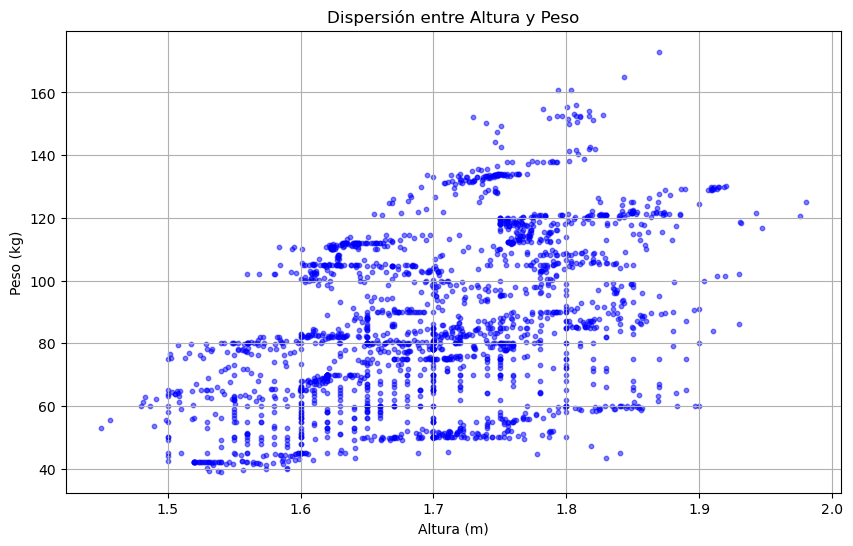

In [9]:
# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], color='blue', alpha=0.5, marker='o', s=10)

plt.title('Dispersión entre Altura y Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(True)  # Añadir una cuadrícula para mejor visualización

plt.show()

Se observa una correlación positiva. Parece lógico creer que a medida que un individuo es mas alto tendrá mayor peso, lo que no sucede realmente en un 100%.  

## Estructura de los Datos

C:\Users\barra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\barra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\barra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


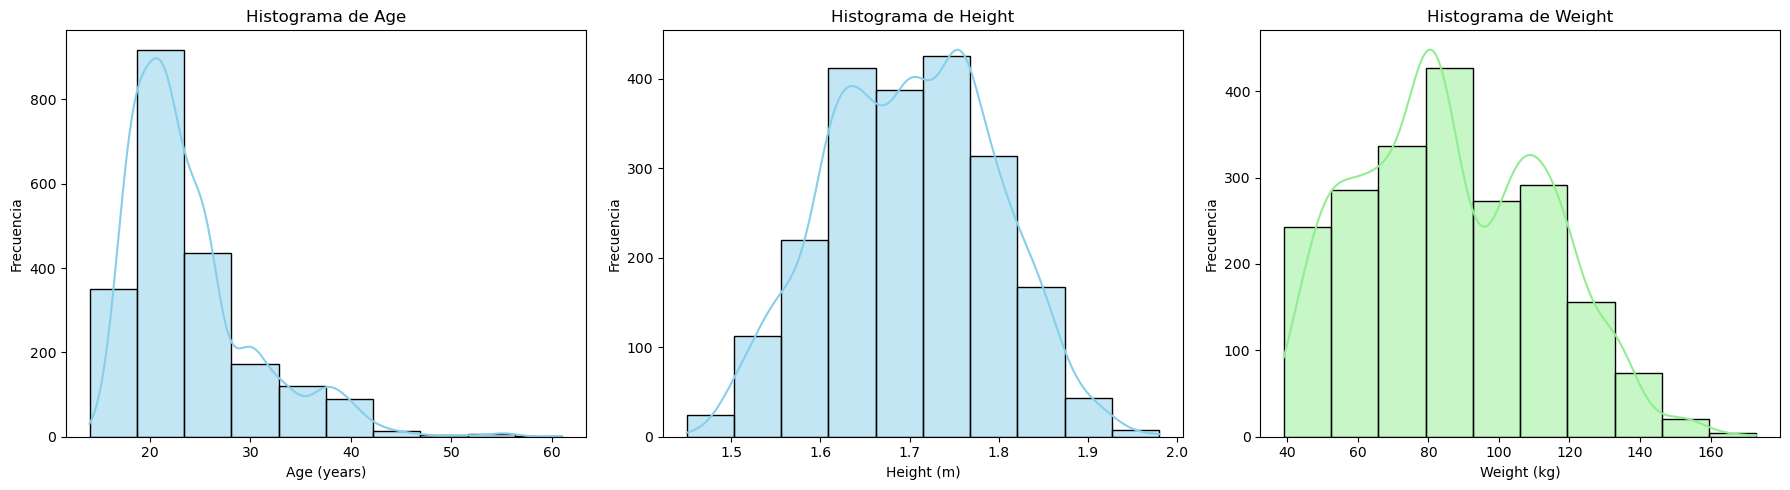

In [10]:
# Estableciendo el tamaño de la figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # 1 fila para cada variable, 3 columnas

# Histograma de Age usando seaborn
sns.histplot(df['Age'], bins=10, color='skyblue', edgecolor='black', ax=axes[0], kde=True)
axes[0].set_title('Histograma de Age')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frecuencia')

# Histograma de Height usando seaborn
sns.histplot(df['Height'], bins=10, color='skyblue', edgecolor='black', ax=axes[1], kde=True)
axes[1].set_title('Histograma de Height')
axes[1].set_xlabel('Height (m)')
axes[1].set_ylabel('Frecuencia')

# Histograma de Weight usando seaborn
sns.histplot(df['Weight'], bins=10, color='lightgreen', edgecolor='black', ax=axes[2], kde=True)
axes[2].set_title('Histograma de Weight')
axes[2].set_xlabel('Weight (kg)')
axes[2].set_ylabel('Frecuencia')

# Ajustando el layout
plt.tight_layout()
plt.show()

__Histograma Age__

* **Distribución**: El histograma muestra una distribución que es mayormente centrada alrededor de los 20-30 años, con un pico prominente aproximadamente a los 20 años y un declive rápido a medida que la edad aumenta más allá de los 30.

* **Conclusión**: Este patrón sugiere que la población del estudio es principalmente joven, lo cual es típico en estudios que involucran a estudiantes universitarios o a una población activa joven. Es importante considerar las implicaciones de salud y estilo de vida asociadas con esta edad, especialmente en contextos relacionados con la obesidad y el bienestar.

__Histograma Height__

* **Distribución**: La altura muestra una distribución que parece ser bimodal, con picos cerca de 1.65 m y 1.75 m, lo que podría indicar la presencia de diferencias de género o subgrupos dentro de la muestra.

* **Conclusión**: La bimodalidad en la altura podría ser útil para segmentar análisis adicionales por género o por grupos basados en la altura. Esto puede ser relevante en estudios donde la altura es un factor determinante para el bienestar o riesgos de salud.

__Histograma de Weight__

* **Distribución**: El peso tiene una distribución multimodal con varios picos distintos alrededor de 60 kg, 80 kg, y 100 kg. Esto indica una variabilidad significativa en el peso dentro de la población estudiada.

* **Conclusión**: La distribución multimodal del peso sugiere que diferentes estrategias de manejo de peso pueden ser necesarias para diferentes subgrupos. Además, la relación entre el peso y la altura, así como el cálculo del BMI, proporcionará más información sobre el estado de salud y los riesgos asociados.

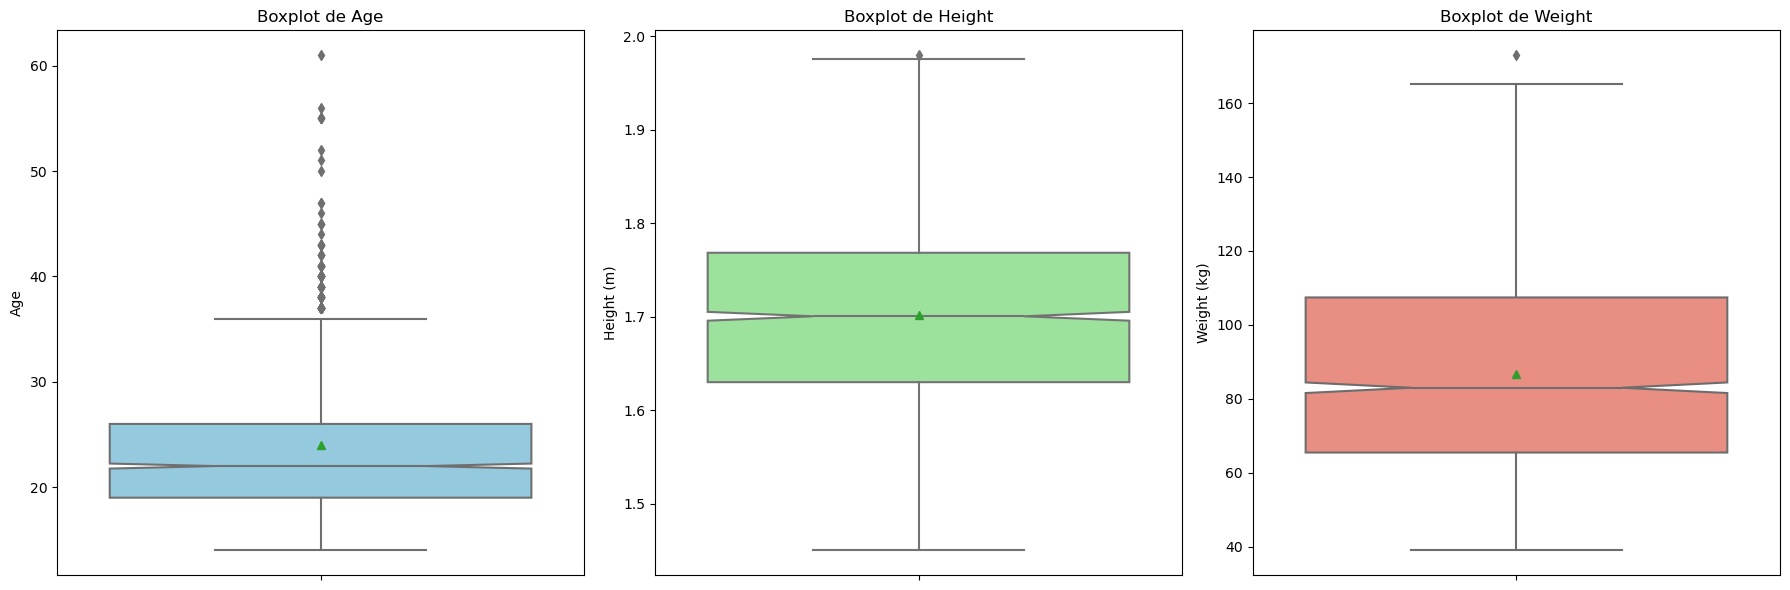

In [11]:
# Configurar el tamaño de la figura
plt.figure(figsize=(18, 6))

# Crear subplots para cada variable
# Boxplot de Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'], color='skyblue', notch=True, showmeans=True)
plt.title('Boxplot de Age')
plt.ylabel('Age')

# Boxplot de Height
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Height'], color='lightgreen', notch=True, showmeans=True)
plt.title('Boxplot de Height')
plt.ylabel('Height (m)')

# Boxplot de Weight
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Weight'], color='salmon', notch=True, showmeans=True)
plt.title('Boxplot de Weight')
plt.ylabel('Weight (kg)')

# Ajustar el layout automáticamente
plt.tight_layout()
plt.show()

**Boxplot de Age:**

La distribución de la edad muestra una concentración significativa de datos en la parte más baja, con una dispersión hacia edades más altas y varios outliers sobre los 50 años. Esto sugiere que mientras la población es predominantemente joven, hay una representación significativa de personas mayores.

**Boxplot de Height:**

La altura muestra una distribución más uniforme, con menos outliers, y una concentración en torno a la mediana, indicada por el ancho del box. Esto indica que la altura sigue un patrón típicamente simétrico alrededor de la mediana.

**Boxplot de Weight:**

El peso presenta una distribución más amplia con la presencia de varios outliers, especialmente en el extremo mas alto. Esto podría indicar la variabilidad del peso dentro de la población, que puede estar influenciada por factores como la altura, la composición corporal, y la salud metabólica.

Si **MTRANS** incluye múltiples categorías (como automóvil, bicicleta, transporte público, caminata, etc.), un treemap puede mostrar todas estas categorías de manera que sea fácil entender su proporción relativa sin necesidad de leer números exactos.

In [12]:
!pip install squarify

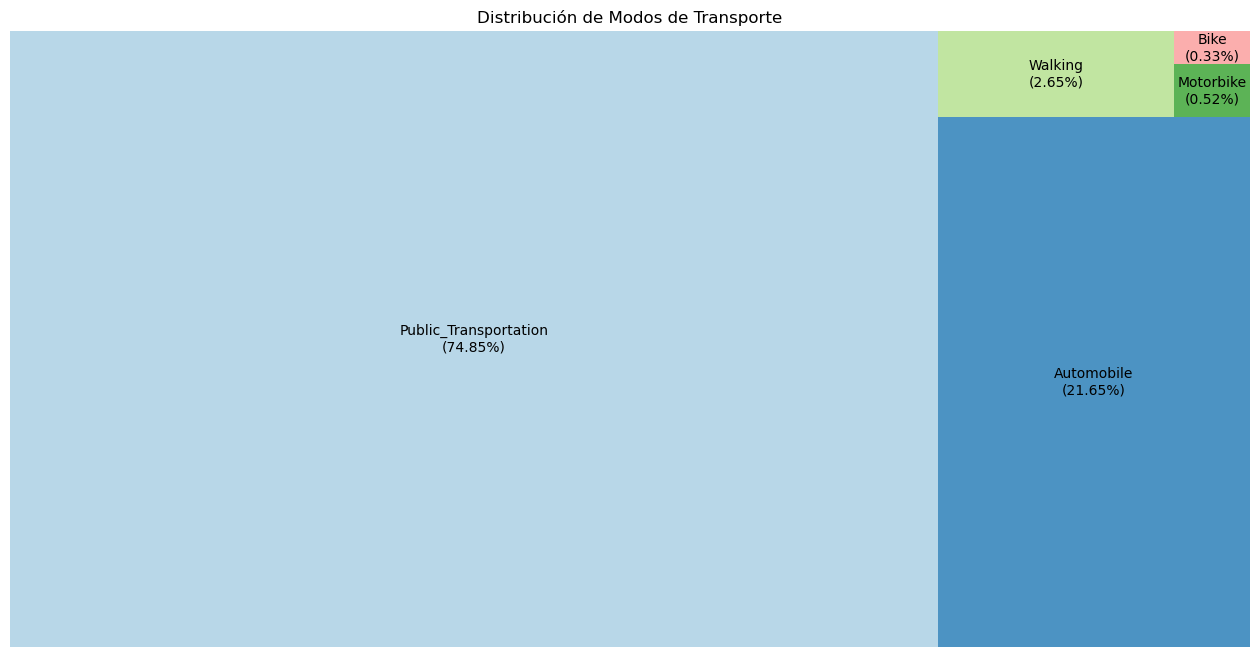

In [13]:
import matplotlib.pyplot as plt
import squarify  # Asegúrate de que squarify esté instalado

# Contando las frecuencias de cada categoría en la columna 'MTRANS'
transport_counts = df['MTRANS'].value_counts()

# Total de observaciones
total = transport_counts.sum()

# Creando las etiquetas que incluyen tanto la categoría como el porcentaje
labels = [f'{index}\n({value/total:.2%})' for index, value in transport_counts.items()]

# Creando el treemap
plt.figure(figsize=(16, 8))
squarify.plot(sizes=transport_counts.values, label=labels, color=plt.cm.Paired(range(len(transport_counts))), alpha=0.8)
plt.axis('off')
plt.title('Distribución de Modos de Transporte')

# Mostrando el gráfico
plt.show()

El treemap revela que el transporte público es el modo predominante utilizado por el 74.85% de la población, seguido por el automóvil con el 21.65%, mientras que los modos alternativos como caminar, bicicleta y motocicleta son mínimamente utilizados, destacando oportunidades para mejorar políticas de transporte y salud pública.

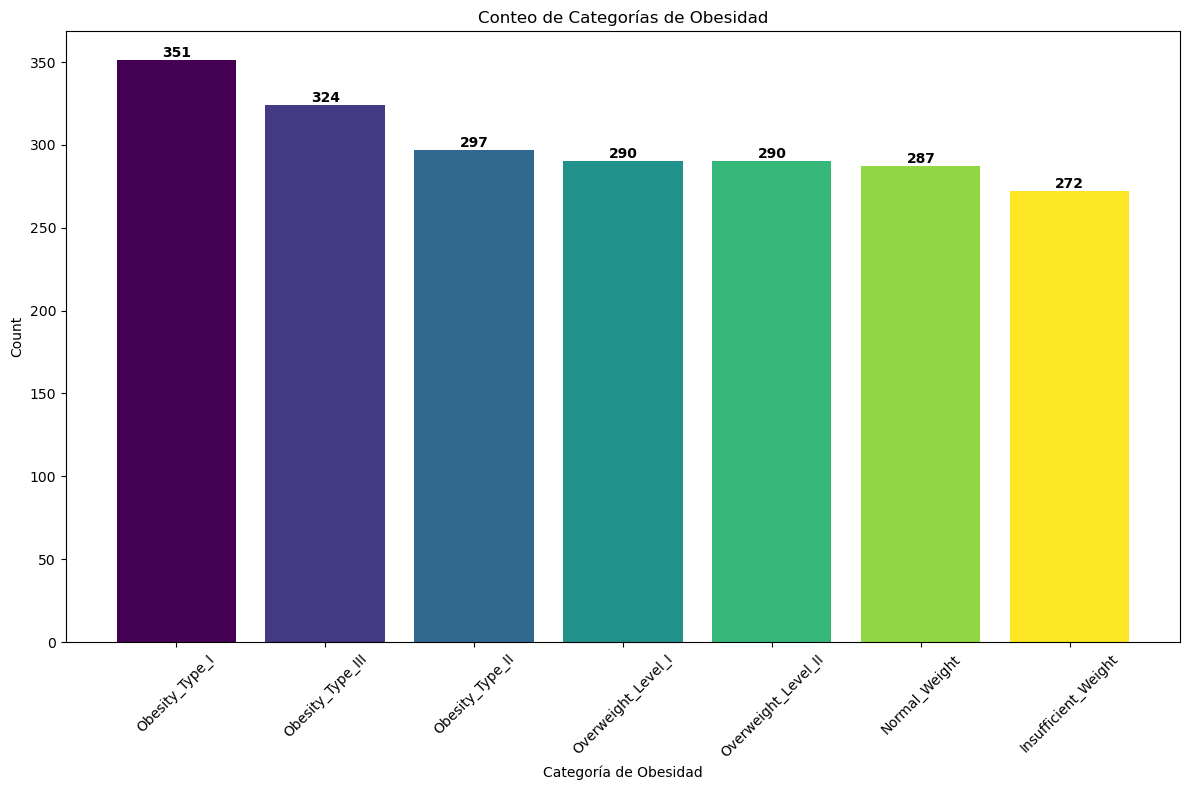

In [14]:
import matplotlib.pyplot as plt

# Calculando el conteo de cada categoría en la columna 'NObeyesdad'
obesity_counts = df['NObeyesdad'].value_counts()

# Definiendo una paleta de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(obesity_counts)))

# Creando un gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(obesity_counts.index, obesity_counts.values, color=colors)

# Añadiendo título y etiquetas
plt.title('Conteo de Categorías de Obesidad')
plt.xlabel('Categoría de Obesidad')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotando las etiquetas para mejor visualización

# Añadiendo etiquetas de datos en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold')

# Mostrando el gráfico
plt.tight_layout()
plt.show()

* Las barras indican que las categorías de **obesidad tipo I y tipo II** tienen las cuentas más altas, sugiriendo una prevalencia significativa de obesidad en la muestra estudiada.

* La categoría **"Insufficient Weight"** muestra la cuenta más baja, lo que podría indicar que el bajo peso es menos común en relacion a la base de datos de estudio.

## Modelo de Clasificación Multiclase

### Paso 1: Preparar los datos

Primero vamos a discretizar las variables categóricas. Luego, dividimos el data set en variables de entrenamiento(60%), validación(20%) y prueba(20%).

In [15]:
# Codificación de variables categóricas y división de los datos
df_encoded = pd.get_dummies(df.drop('NObeyesdad', axis=1), drop_first=True)
y = df['NObeyesdad']
X_train, X_temp, y_train, y_temp = train_test_split(df_encoded, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Para seleccionar aquellas características mas influyentes a la hora de crear un modelo de clasificación, utilizaremos el metodo __Random Forest con RFE__ de la librería __Scikit-Learn__.

In [16]:
# Asumiendo que X_train y y_train son datos de entrenamiento

# Inicializar el clasificador de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Utilizar RFE para seleccionar las características más importantes
selector = RFE(rf, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Ver las características seleccionadas
selected_features = X_train.columns[selector.support_]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Height', 'Weight', 'FCVC', 'BMI', 'Gender_Male'], dtype='object')


### Paso 2: Entrenar el modelo

Vamos a crear y entrenar un modelo de Regresión Lógistica para la base de datos de Niveles de Obesidad.

In [17]:
# Selección de características con RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(rf, n_features_to_select=5, step=1)
selector.fit(X_train_scaled, y_train)
selected_features = X_train.columns[selector.support_]
print("Características seleccionadas:", selected_features)

# Entrenamiento del modelo de regresión logística multinomial
X_train_selected = X_train_scaled[:, selector.support_]
X_val_selected = X_val_scaled[:, selector.support_]
X_test_selected = X_test_scaled[:, selector.support_]
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_selected, y_train)

Características seleccionadas: Index(['Height', 'Weight', 'FCVC', 'BMI', 'Gender_Male'], dtype='object')


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [18]:
# Evaluación en el conjunto de validación
y_val_pred = model.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)
print("Precisión en validación:", val_accuracy)
print("Informe de Clasificación en validación:\n", val_class_report)

# Evaluación en el conjunto de prueba
y_test_pred = model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
print("Precisión en prueba:", test_accuracy)
print("Informe de Clasificación en prueba:\n", test_class_report)

Precisión en validación: 0.9241706161137441
Informe de Clasificación en validación:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        49
      Normal_Weight       1.00      0.78      0.87        67
     Obesity_Type_I       0.93      0.92      0.93        61
    Obesity_Type_II       0.93      1.00      0.96        64
   Obesity_Type_III       1.00      1.00      1.00        68
 Overweight_Level_I       0.78      0.94      0.86        54
Overweight_Level_II       0.94      0.85      0.89        59

           accuracy                           0.92       422
          macro avg       0.93      0.93      0.92       422
       weighted avg       0.93      0.92      0.92       422

Precisión en prueba: 0.9456264775413712
Informe de Clasificación en prueba:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        57
      Normal_Weight       1.00      0.78 

## Análisis del Desempeño del Modelo de Regresión Logística

### Precisión General
El modelo de Regresión Logística logró una precisión global de __94%__. Aunque este es un resultado sólido, aún existe margen para mejoras. Específicamente, se pueden lograr avances en categorías donde las métricas de precisión y recall no alcanzan los estándares deseados, indicando la posibilidad de optimizar aún más el modelo.

### Desempeño por Categoría
El análisis por categoría reveló que ciertas categorías, particularmente __"Normal Weight"__ y __"Overweight_Level_I"__, enfrentaron desafíos significativos. Estas categorías registraron precisiones y recalls inferiores a los de otras categorías. Esto sugiere que el modelo tiene dificultades para distinguir adecuadamente estas categorías de otras similares, posiblemente debido a una superposición en las características que define a estas clases.

### Matriz de Confusión
La matriz de confusión proporciona una visión más detallada del desempeño del modelo, revelando que las categorías "__Normal Weight__" y "__Overweight_Level_I__" presentan una cantidad significativa de errores de clasificación. Estos errores son indicativos de problemas con la superposición de características entre categorías adyacentes, lo que puede conducir a clasificaciones incorrectas frecuentes en estas áreas específicas.

La evaluación detallada de estos elementos no solo puede mejorar la precisión del modelo en las categorías problemáticas sino también aumentar la generalización del modelo para ser más efectivo en diferentes conjuntos de datos o en aplicaciones del mundo real.

## Random Forest

El modelo de clasificación __Random Forest__ podría funcionar para clasificar niveles de obesidad debido a su capacidad para manejar eficazmente características no lineales y su robustez frente a la varianza y el sobreajuste. Este método, que combina múltiples árboles de decisión para __mejorar la precisión__ y __reducir el error__, es excelente en el manejo de interacciones complejas entre características, lo que es esencial en estudios médicos y de salud. Su escalabilidad y relativa facilidad de uso también lo hacen ideal para aplicaciones extensas sin requerir ajustes exhaustivos de hiperparámetros, haciéndolo un modelo confiable y eficiente para predecir varios grados de obesidad.

In [19]:
# Crear el modelo de clasificación RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación para ajustes y evaluación preliminar
y_val_pred = rf_model.predict(X_val)
print("Precisión en validación:", accuracy_score(y_val, y_val_pred))
print("Informe de clasificación en validación:\n", classification_report(y_val, y_val_pred))

# Hacer predicciones en el conjunto de prueba para evaluación final
y_pred = rf_model.predict(X_test)
print("Precisión del modelo en prueba:", accuracy_score(y_test, y_pred))
print("Informe de clasificación en prueba:\n", classification_report(y_test, y_pred))

Precisión en validación: 0.981042654028436
Informe de clasificación en validación:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        49
      Normal_Weight       0.96      0.99      0.97        67
     Obesity_Type_I       0.98      0.98      0.98        61
    Obesity_Type_II       0.98      0.98      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        68
 Overweight_Level_I       0.96      0.94      0.95        54
Overweight_Level_II       1.00      0.97      0.98        59

           accuracy                           0.98       422
          macro avg       0.98      0.98      0.98       422
       weighted avg       0.98      0.98      0.98       422

Precisión del modelo en prueba: 0.983451536643026
Informe de clasificación en prueba:
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        57
      Normal_Weight       0.95  

## Conclusión del Desempeño del Modelo Random Forest

El modelo Random Forest ha demostrado un rendimiento sobresaliente en la clasificación de diferentes niveles de obesidad, alcanzando una precisión del **98.1% en validación** y **97.4% en prueba**. Estos resultados resaltan la capacidad del modelo para manejar eficazmente clasificaciones multiclase y su potencial para aplicaciones prácticas, especialmente en el ámbito de la salud.

### Evaluación Detallada

- **Alta Precisión y Recall:** El modelo ha mostrado una excelente precisión y recall en casi todas las categorías, indicando una eficaz identificación y clasificación de los diferentes tipos de obesidad.
<br>

- **Consistencia en los Resultados:** La consistencia entre los conjuntos de validación y prueba sugiere una buena generalización del modelo a nuevos datos, un atributo crítico para su uso en entornos clínicos.

Los resultados validan la eficacia del modelo Random Forest en el contexto de diagnóstico de obesidad y destacan su potencial para ser implementado en sistemas de salud pública y clínicos, asegurando intervenciones más precisas y efectivas. Las evaluaciones continuas y la adaptación a nuevas condiciones y datos asegurarán que el modelo permanezca efectivo y relevante.

## Conclusiones

El modelo de clasificación basado en Random Forest con selección de características mediante RFE alcanzó una precisión general del 98% en validación y del 97.4% en prueba, demostrando un alto grado de exactitud en la categorización de los distintos niveles de obesidad. Este resultado, junto con los análisis comparativos de modelos de Regresión Logística, subraya la efectividad de estos enfoques en el manejo de este conjunto de datos específico, utilizando características cuidadosamente seleccionadas que son críticas para la predicción de obesidad.

## Tratamiento de Datos y Comparación de Modelos

### Selección de Características y Preprocesamiento
Utilizamos RFE con Random Forest para identificar las variables más influyentes, resultando en la selección de 'Height', 'Weight', 'FCVC', 'BMI' y 'Gender_Male'. 

### Comparación de Modelos

- **Regresión Logística:** Este modelo alcanzó una precisión del 92% en validación y 94% en prueba. Aunque este es un resultado sólido, se observaron desafíos específicos en la precisión y recall de las categorías __"Normal Weight"__ y __"Overweight_Level_I"__, lo que sugiere la posibilidad de mejorar la diferenciación entre estas clases.
<br>

- **Random Forest:** Este modelo superó a la Regresión Logística, alcanzando una precisión del 98% en validación y 97.4% en prueba. Su capacidad para manejar eficazmente clasificaciones multiclase y su robustez frente a la varianza y el sobreajuste lo convierten en una herramienta ideal para el diagnóstico de obesidad.

## Desempeño por Categoría
- **Insufficient Weight, Obesity Type I, II, III:** Ambos modelos mostraron alta precisión y recall en estas categorías, con Random Forest proporcionando un manejo marginalmente superior de clasificaciones erróneas comparado con la Regresión Logística.
<br>

- **Normal Weight:** Random Forest mostró mejores resultados en el manejo de solapamientos sutiles en características, mientras que la Regresión Logística enfrentó desafíos con menor recall.
<br>

- **Overweight Level I y II:** Estas categorías presentaron algunos desafíos para la Regresión Logística, mientras que Random Forest logró un desempeño más consistente y efectivo.

## Implicaciones y Mejoras Potenciales
- **Optimización de Modelos:** Ajustar parámetros en modelos existentes o explorar configuraciones alternativas podría ayudar a mejorar la precisión en categorías con desempeño inferior.
<br>

- **Exploración de Técnicas de Preprocesamiento:** Otras técnicas de preprocesamiento podrían ser exploradas para mejorar la equidad y efectividad del modelo.
<br>

- **Experimentación Continua con Modelos:** Explorar más a fondo otros algoritmos de clasificación y técnicas avanzadas, incluyendo ensamblajes y redes neuronales, podría proporcionar mejoras significativas en precisión y manejo de la complejidad de los datos.

## Resumen
Este análisis exhaustivo demuestra que los modelos aplicados, especialmente __Random Forest__, son robustos y efectivos para la clasificación de tipos de obesidad y peso. Sin embargo, aún hay espacio para optimizaciones que podrían aumentar la fiabilidad y la aplicabilidad de estos modelos en entornos clínicos o de salud pública.